In [1]:
import pandas as pd
import pylab as plt
#plt.style.use('dark_background')
from jupyterthemes import jtplot
jtplot.style()
import seaborn as sns
from zedstat.ci import ci

In [2]:
rf=pd.read_csv('./irat_predictions.csv',index_col=0)
import numpy as np
Ename='Emergenet emergence estimate'
Iname='Emergenet impact estimate'
gmname='geometric mean of Edistances'
rf=rf[rf['Influenza Virus']!='A/duck/New York/1996']
rf=rf.rename(columns={'Influenza Virus':'strain', 'Virus Type':'subtype', 'Dates of Risk Assessment':'IRAT assessment date',
       'Potential Emergence Estimate':'IRAT Emergence Estimate', 'Potential Impact Estimate':'IRAT Impact Estimate',
       'Summary Risk Score Category':'summary risk', 'Geometric Mean':gmname,
       'Predicted Emergence Score':Ename, 'Predicted Impact Score':Iname})
rf[gmname] = -1*rf[gmname]

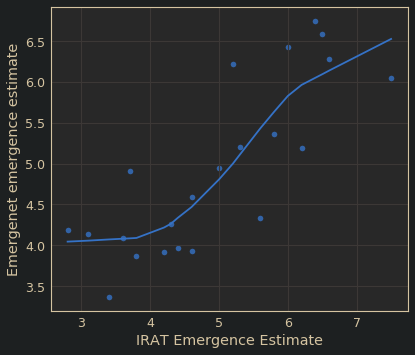

In [3]:
# the geometric mean of E-dist (HA,NA) is linear for high risk sequences, and not sensitive for low risk sequences
sns.regplot(x='IRAT Emergence Estimate',y=Ename,data=rf,lowess=1)

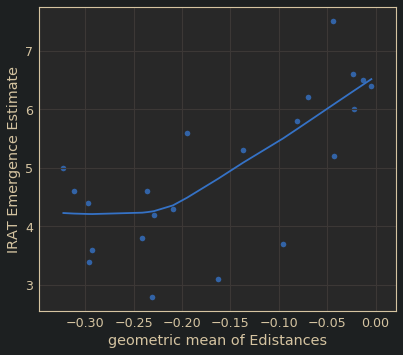

In [4]:
# the geometric mean of E-dist (HA,NA) is linear for high risk sequences, and not sensitive for low risk sequences
ax=sns.regplot(y='IRAT Emergence Estimate',x=gmname,data=rf,lowess=1)

aic:  61.23560139479055 p-value:  0.0002579111831184047 correlation:  0.7037034213676274


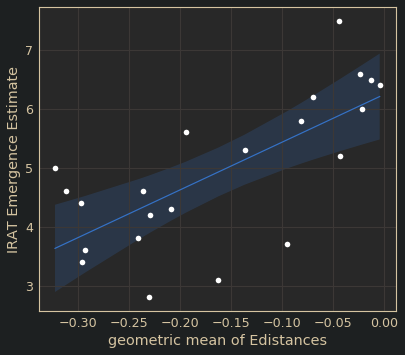

In [5]:
xvar=gmname
yvar='IRAT Emergence Estimate'
pred,pval,aic,corr,est=ci(rf,xvar,yvar,alpha=.05)
fig, ax = plt.subplots()
plt.fill_between(pred.index,pred.ub,pred.lb,alpha=.2)
pred.pred.plot()
rf.set_index(xvar)[yvar].plot(style='wo')
plt.gca().set_ylabel(yvar)
print('aic: ',aic,'p-value: ',pval,'correlation: ',corr)

pred=pred.rename(columns={'pred':'pred_GM','ub':'ub_GM','lb':'lb_GM'})
rf0=rf.join(pred,on=xvar)

In [6]:
print(est.params)

[6.2466739  8.10631438]


aic:  52.71494874341595 p-value:  4.747885597969362e-06 correlation:  0.8107388277447942


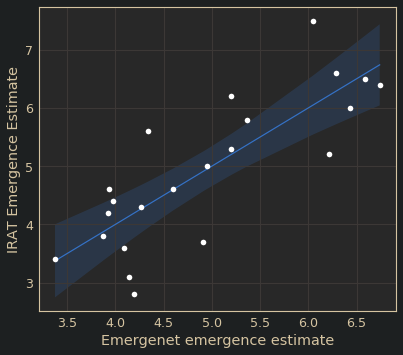

In [7]:
yvar='IRAT Emergence Estimate'
xvar=Ename
pred,pval,aic,corr,est=ci(rf,xvar,yvar,alpha=.05)
fig, ax = plt.subplots()
plt.fill_between(pred.index,pred.ub,pred.lb,alpha=.2)
pred.pred.plot()
rf.set_index(xvar)[yvar].plot(style='wo')
plt.gca().set_ylabel(yvar)
print('aic: ',aic,'p-value: ',pval,'correlation: ',corr)
pred=pred.rename(columns={'pred':'pred_E','ub':'ub_E','lb':'lb_E'})
rf1=rf0.join(pred,on=xvar)

In [8]:
# this is incredible! This basically means that the model is x=y. The intercept is zero, the gradient is 1
est.params

array([1.11022302e-15, 1.00000000e+00])

aic:  55.22705059781049 p-value:  3.343599555301797e-05 correlation:  0.7651911631918318


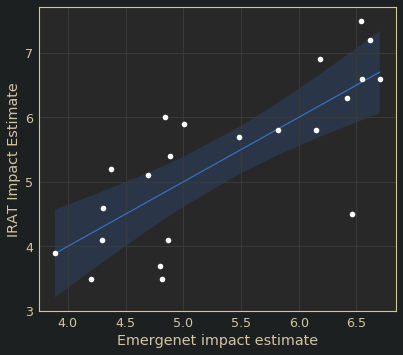

In [9]:
yvar='IRAT Impact Estimate'
xvar=Iname
pred,pval,aic,corr,est=ci(rf,xvar,yvar,alpha=.05)
fig, ax = plt.subplots()
plt.fill_between(pred.index,pred.ub,pred.lb,alpha=.2)
pred.pred.plot()
rf.set_index(xvar)[yvar].plot(style='wo')
plt.gca().set_ylabel(yvar)
print('aic: ',aic,'p-value: ',pval,'correlation: ',corr)
pred=pred.rename(columns={'pred':'pred_I','ub':'ub_I','lb':'lb_I'})
rf2=rf1.join(pred,on=xvar)

In [10]:
# this is incredible! This basically means that the model is x=y. The intercept is zero, the gradient is 1
est.params

array([-8.8817842e-16,  1.0000000e+00])

In [33]:
rf2.sort_values('geometric mean of Edistances').to_csv('./tex/Figures/plotdata/fulldataframe.csv')

In [32]:
rf2.columns

Index(['strain', 'subtype', 'IRAT assessment date', 'IRAT Emergence Estimate',
       'IRAT Impact Estimate', 'summary risk', 'HA Sequence', 'NA Sequence',
       'HA Qnet Sample', 'NA Qnet Sample', 'HA Average Qdistance',
       'NA Average Qdistance', 'Both Average Qdistance',
       'geometric mean of Edistances', 'Emergenet emergence estimate',
       'Emergenet impact estimate', 'pred_GM', 'lb_GM', 'ub_GM', 'pred_E',
       'lb_E', 'ub_E', 'pred_I', 'lb_I', 'ub_I', 'yr'],
      dtype='object')

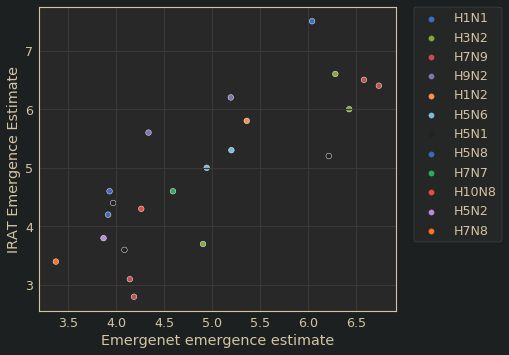

In [30]:
import seaborn as sns
sns.scatterplot(x=Ename, y='IRAT Emergence Estimate',hue='subtype',data=rf)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [34]:
rf2

,strain,subtype,IRAT assessment date,IRAT Emergence Estimate,IRAT Impact Estimate,summary risk,HA Sequence,NA Sequence,HA Qnet Sample,NA Qnet Sample,...,pred_GM,lb_GM,ub_GM,pred_E,lb_E,ub_E,pred_I,lb_I,ub_I,yr
0,A/swine/Shandong/1207/2016,H1N1,Jul 2020,7.5,6.9,Moderate,MEARLFVLFCAFTTLKADTICVGYHANNSTDTVDTILEKNVTVTHS...,MNPNQKIITIGSICMTIGIASLILQIGNIISIWISHSIQIENQNQS...,1000.0,1000.0,...,5.890315,5.279080,6.501549,6.043770,5.538074,6.549466,6.187258,5.701093,6.673424,2016
1,A/Ohio/13/2017,H3N2,Jul 2019,6.6,5.8,Moderate,MKTIIALSHILCLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILVTTITLHFKQHNCDSSP...,1000.0,1000.0,...,6.054093,5.384125,6.724061,6.286471,5.717802,6.855140,6.153447,5.676050,6.630844,2017
2,A/Hong Kong/125/2017,H7N9,May 2017,6.5,7.5,Moderate-High,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTERGVEVVN...,MNPNQKILCTSATAITIGAIAVLIGIANLGLNIGLHLKPGCNCSHS...,437.0,437.0,...,6.140695,5.438230,6.843159,6.585211,5.933283,7.237139,6.540149,5.952309,7.127988,2017
3,A/Shanghai/02/2013,H7N9,Apr 2016,6.4,7.2,Moderate-High,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTERGVEVVN...,MNPNQKILCTSATAIIIGAIAVLIGMANLGLNIGLHLKPGCNCSHS...,178.0,178.0,...,6.210842,5.481445,6.940240,6.740483,6.043471,7.437496,6.620085,6.007207,7.232963,2013
4,A/Anhui-Lujiang/39/2018,H9N2,Jul 2019,6.2,5.9,Moderate,METVSLITILLVATASNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPS...,31.0,30.0,...,5.680475,5.137720,6.223229,5.196902,4.844311,5.549492,5.002380,4.614665,5.390096,2018
5,A/Indiana/08/2011,H3N2,Dec 2012,6.0,4.5,Moderate,MKTIIAFSCILCLIFAQKLPGSDNSMATLCLGHHAVPNGTLVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILVTTVTLHFKQHDYNSPP...,1000.0,1000.0,...,6.069778,5.393991,6.745565,6.431361,5.822966,7.039756,6.457251,5.894706,7.019796,2011
6,A/California/62/2018,H1N2,Jul 2019,5.8,5.7,Moderate,MKVKLMVLLCTFTATYADTICVGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSISLTLAAMCFLMQTAILVTNVTLHFNQCECHYPP...,55.0,55.0,...,5.586238,5.071021,6.101455,5.363065,4.992560,5.733569,5.483384,5.118547,5.848221,2018
7,A/Bangladesh/0994/2011,H9N2,Feb 2014,5.6,5.4,Moderate,METVSLMTILLLVTTSNADKICIGHQSTNSTETVDTLTETNVPVTH...,MNPNQKIIALGSASLTIAIICLLIQIAILATTMTLHFMQNEHTNST...,-1.0,-1.0,...,4.668755,4.235552,5.101957,4.338890,3.942515,4.735265,4.885887,4.479422,5.292351,2011
8,A/Sichuan/06681/2021,H5N6,Oct 2021,5.3,6.3,Moderate,MENIVLLLAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKITCISATGVTLSIVSLLIGITNLGLNIGLHYKVSDSTTIN...,45.0,45.0,...,5.137312,4.712180,5.562445,5.202812,4.849721,5.555903,6.415099,5.865125,6.965073,2021
9,A/Vietnam/1203/2004,H5N1,Nov 2011,5.2,6.6,Moderate,MEKIVLLFAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKIITIGSICMVTGIVSLMLQIGNMISIWVSHSIHTGNQHQS...,258.0,246.0,...,5.897802,5.283971,6.511633,6.218132,5.667694,6.768571,6.701150,6.062309,7.339992,2004
